<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/Phys824_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conductance and Shot Noise of Pseudodiffusive and Diffusive Electron Transport Through Graphene Nanoribbons
### © Andrew Crossman, University of Delaware
[PHYS824: Nanophysics & Nanotechnology](https://wiki.physics.udel.edu/phys824) 

In [1]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.3 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp38-cp38-linux_x86_64.whl size=4293456 sha256=7923f8979dc7915006c9cd1ca7d2a24a297547914433131c887d606ad1da46d9
  Stored in directory: /root/.cache/pip/wheels/6f/df/9e/c539998ebc40515fff5ab4a3254a8defafa218f89848e47de8
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp38-cp38-linux_x86_64.whl size=231215 sha256=35517ed98fbbb917f4877424ae10bcca3bd5244a83b2d61a9fe7f681ff4bf514
  Stored in directory: /root/.cache/pip/wheels/60/fc/af/bd51765e167af783d7211176ba6da429472161b2462d4d5bc6
Successfully built kwant tinyarray


In [2]:
# Imports
import numpy as np
import kwant 
from kwant.builder import HoppingKind 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [3]:
# If using Google Colab Include
from google.colab import files

## Part I: Semi-infinite ZGNR with Leads

In [8]:
graphene = kwant.lattice.general([[1, 0], [1/2, np.sqrt(3)/2]],  # lattice vectors
                                 [[0, 0], [0, 1/np.sqrt(3)]])  # Coordinates of the sites
a, b = graphene.sublattices
gr_lat = kwant.lattice.honeycomb(a=1)
v1, v2 = gr_lat.prim_vecs 
t = 1

In [18]:
def ribbon_sys(pos):
    x, y = pos
    width = 6
    length = 10
    return abs(x) < 0.5*length and abs(y) < 0.5*width

def ribbon_lead(pos):
    x, y = pos
    width = 6
    return abs(y) < 0.5*width 

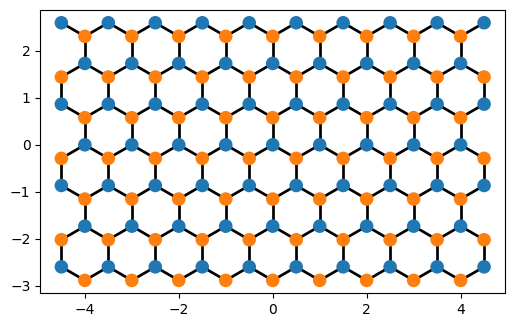

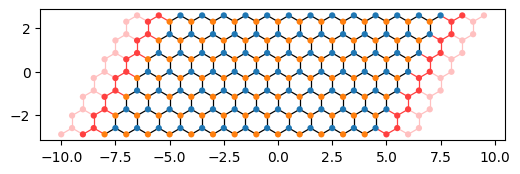

In [19]:
graphene_sys = kwant.Builder()
graphene_sys[gr_lat.shape(ribbon_sys, (0, 0))] = 0.0
graphene_sys[gr_lat.neighbors(1)] = t
kwant.plot(graphene_sys, dpi=100);

left_direction = kwant.TranslationalSymmetry(-v1)
left_lead = kwant.Builder(left_direction)
left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = 0
left_lead[gr_lat.neighbors()] = 2.7

graphene_sys.attach_lead(left_lead)
graphene_sys.attach_lead(left_lead.reversed())
kwant.plot(graphene_sys, dpi=100);

graphene_sys = graphene_sys.finalized()
left_lead = left_lead.finalized()

In [24]:
t10 = []       # Transmission from lead 0 to lead 1
energies = np.linspace(-5, 5, 200)

for energy in energies:
    smatrix = kwant.smatrix(graphene_sys, energy)

    # Here, we calculate the transmission 
    # from the first lead (left lead) 
    # to the second lead (right lead). 
    # Indexing starts at zero, and it
    # depends on the order in which 
    # the leads were attached. Lead
    # which is attached first will get 
    # the index zero, the one that is
    # attached second will get the index
    # one etc.
    
    # The transmission function is T(E) = Tr[t*t^\dagger]
    # Transmission from the lead 0 to lead 1
    t10.append(smatrix.transmission(1, 0))
t10 = np.array(t10)
fano = [(x*(1-x))/x for x in t10]

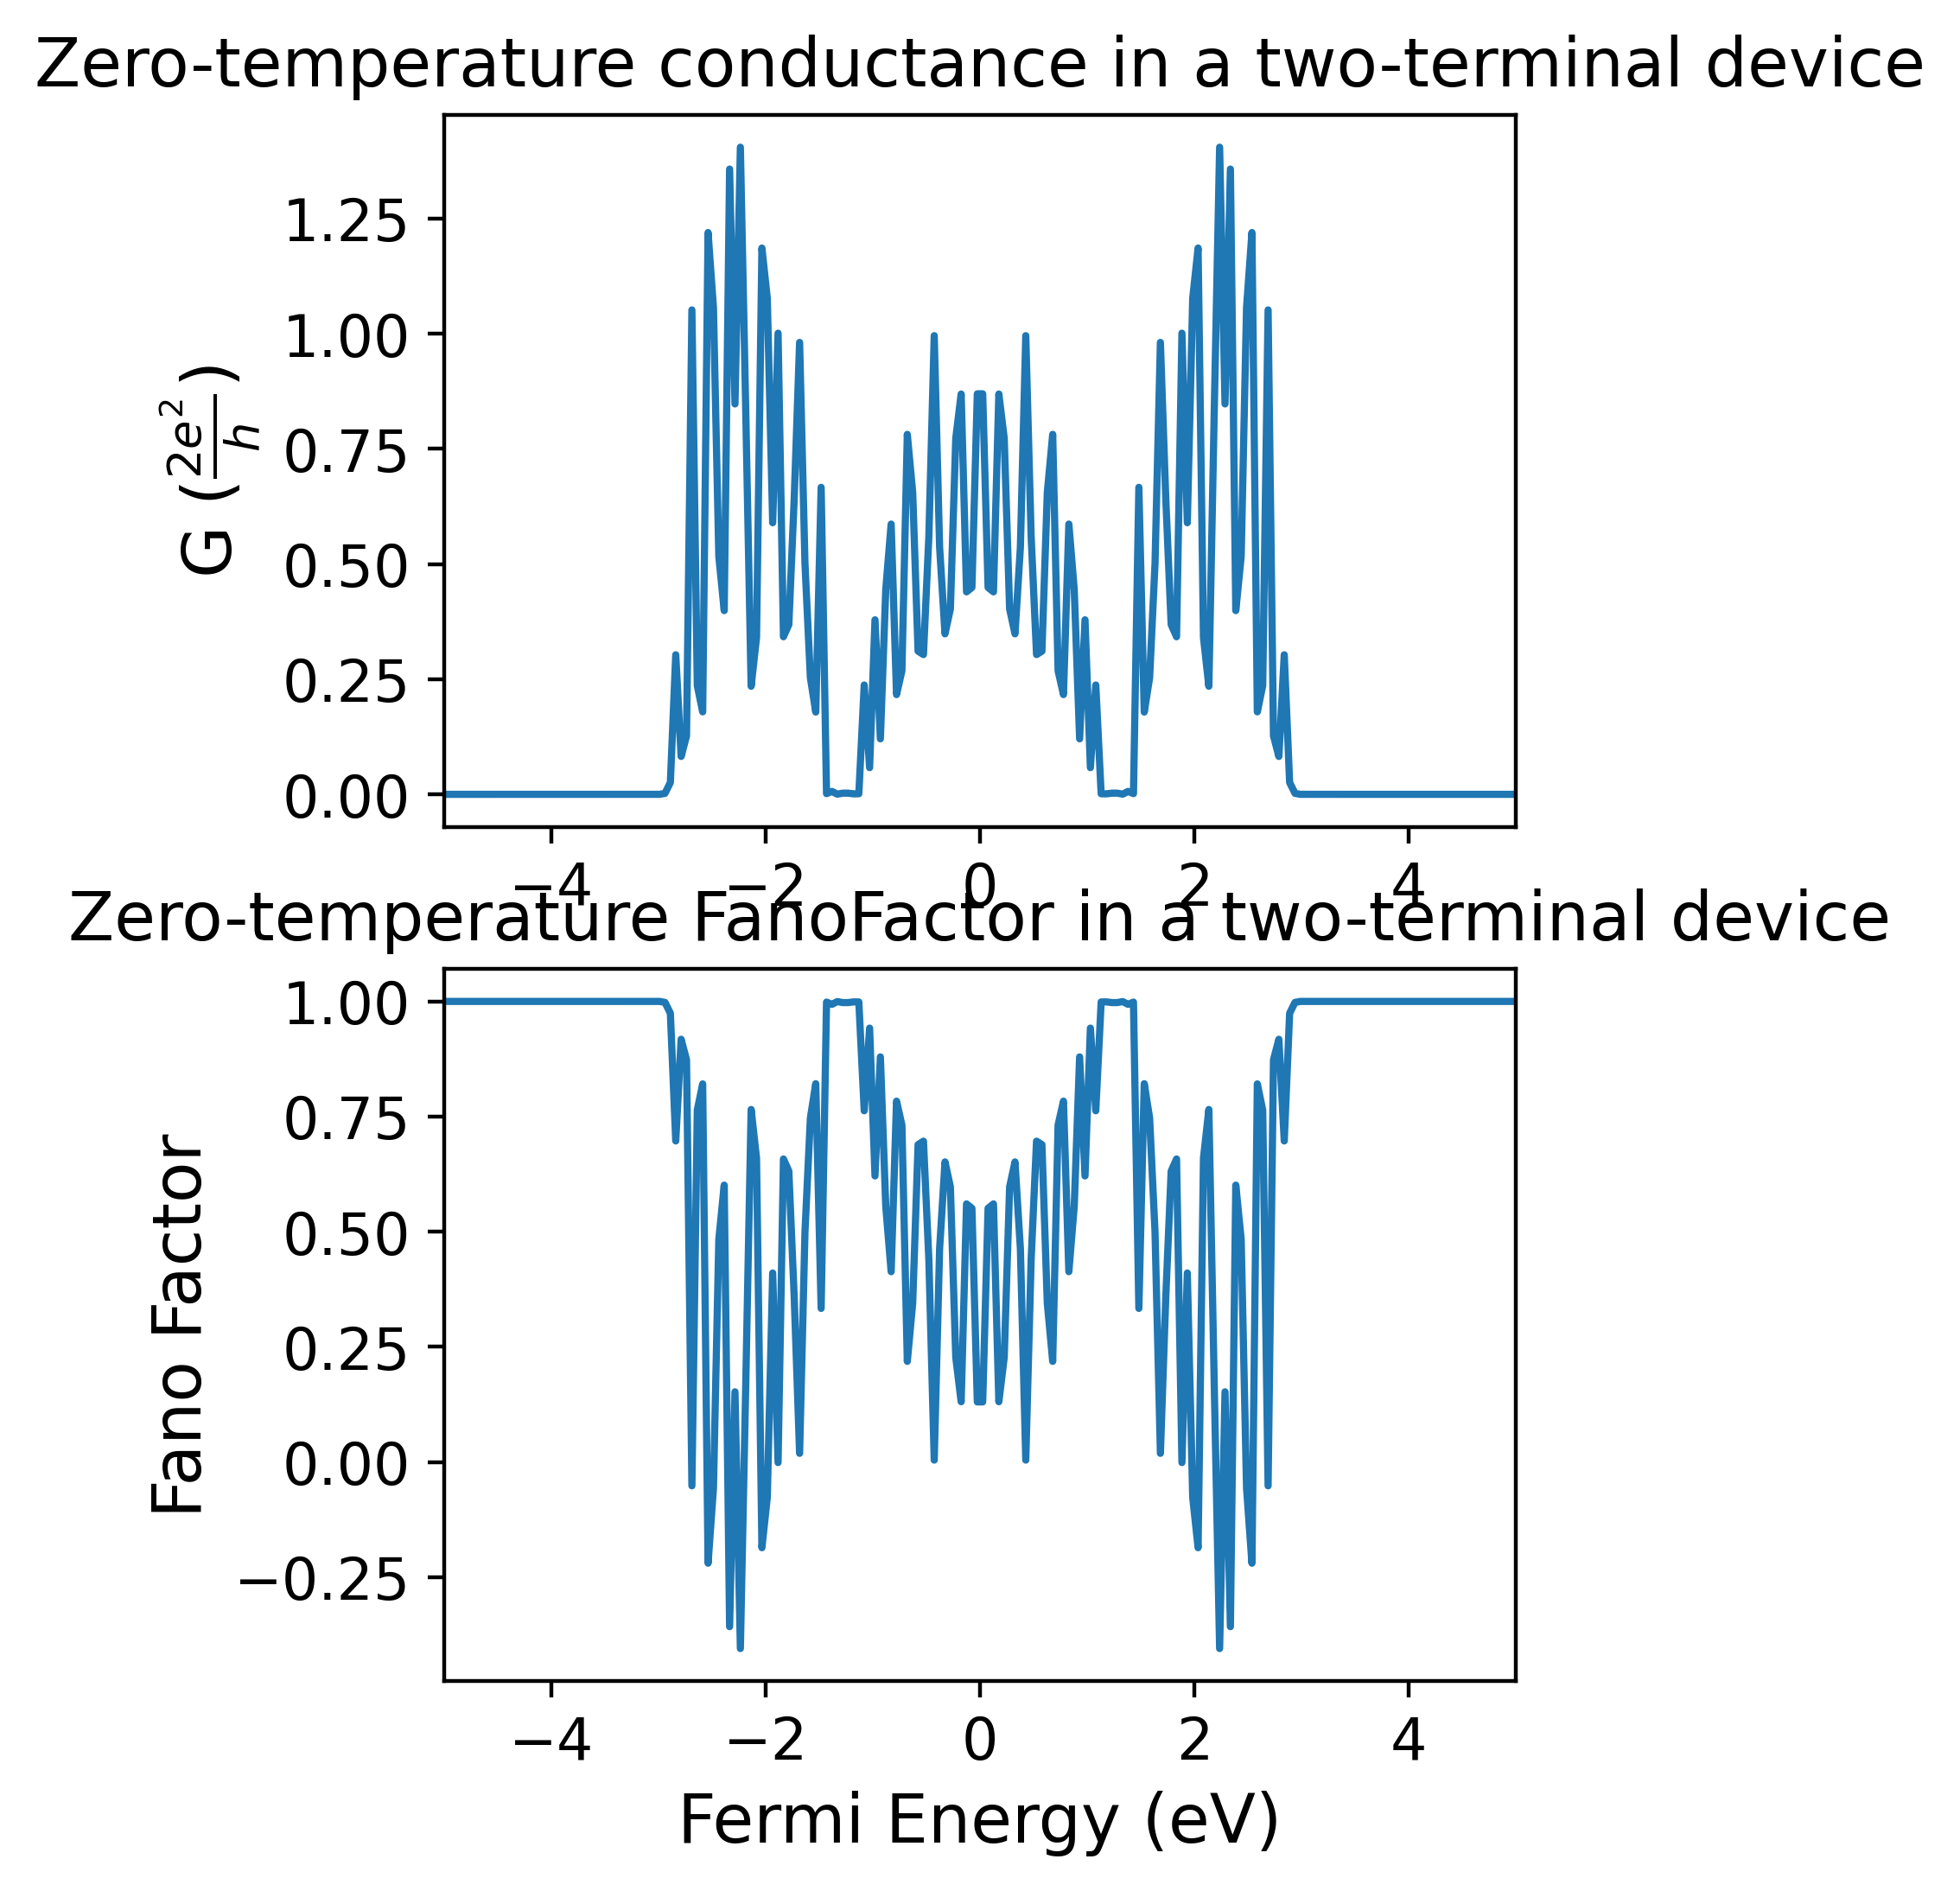

In [27]:
plt.figure(dpi=400,figsize=(4,6))
plt.subplot(211)
axes = plt.gca()
axes.set_title('Zero-temperature conductance in a two-terminal device', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14)
axes.set_xlim(-5,5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(energies, t10, color='C0');

plt.subplot(212)
axes = plt.gca()
axes.set_title('Zero-temperature FanoFactor in a two-terminal device', fontsize=14)
axes.set_xlabel('Fermi Energy (eV)', fontsize=14)
axes.set_ylabel(r'Fano Factor', fontsize=14)
axes.set_xlim(-5,5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(energies, fano,color='C0')